In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Load in data
Here we load in the Age, Sex and Length (ASL) data. We only keep columns that we expect to need for analysis

In [79]:
data_small = pd.read_csv('ASL_master.csv', usecols =["Species", "sampleYear", "sampleDate", "Length", "Weight", "Sex", 
                "Salt.Water.Age", "Fresh.Water.Age", "Lat", "Lon", "DistrictID", "Sub.DistrictID", "Flag"])
data_small.columns

/Users/jneilcottle/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Species', 'sampleYear', 'sampleDate', 'Length', 'Weight', 'Sex',
       'Salt.Water.Age', 'Fresh.Water.Age', 'Flag', 'DistrictID',
       'Sub.DistrictID', 'Lat', 'Lon'],
      dtype='object')

### Double check the rate of missing values
If there are a lot of missing values (read in as Nan) then that particular feature will not be reliable. It is encouraging that most of the flags are Nan but we can also see that 

In [80]:
#find the % of entries that are nan for each column
data_small.isna().sum()/data_small.shape[0]

Species            0.000000
sampleYear         0.000464
sampleDate         0.000464
Length             0.251804
Weight             0.952788
Sex                0.099224
Salt.Water.Age     0.171890
Fresh.Water.Age    0.144319
Flag               0.994672
DistrictID         0.010361
Sub.DistrictID     0.354788
Lat                0.619827
Lon                0.619836
dtype: float64

### Plot Mean Length by Year
Here we plot the mean length of salmon by year, for each species in order to get an idea of general trends

Text(0.5, 0, 'Year')

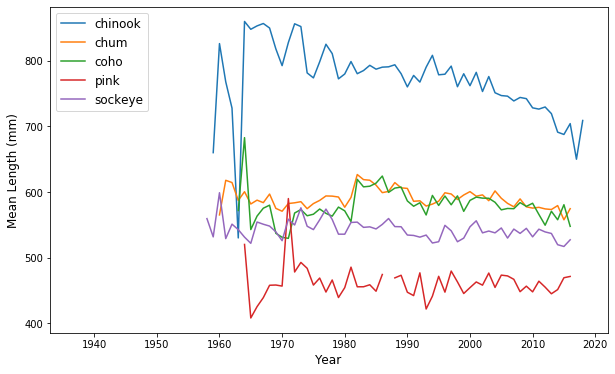

In [90]:
speciesbyyear = data_small.groupby(["sampleYear", "Species"])
meanbyyear = speciesbyyear['Length'].mean()
stdbyyear = speciesbyyear['Length'].std()
df_mean = meanbyyear.unstack()
df_std = stdbyyear.unstack()

fig, ax = plt.subplots(figsize=(10,6))
for s in data_small['Species'].unique():
    ax.plot(df_mean[s].index, df_mean[s].values, label = s)
ax.legend(fontsize = 12)
ax.set_ylabel('Mean Length (mm)', fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)

### A Simple Growth Metric
As a first pass at considering the growth rates of salmon, we can compare the change in mean length with respect to the previous year. This is defined as 
$$
C = \frac{M_{y} - M_{y-1}}{M_{y-1}}
$$

with y the current year. Looking across years, we may be able to determine a trend. Perhaps high growth years preceed low growth years. 

Text(0.5, 1.0, 'chinook Salmon')

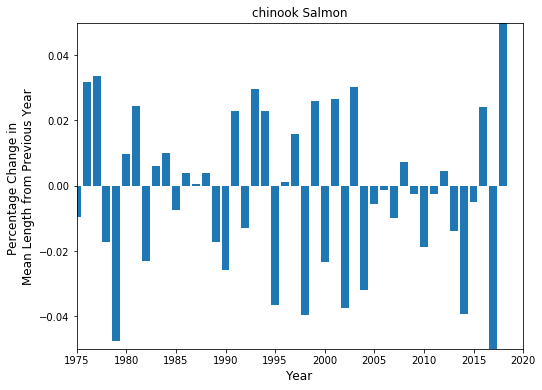

In [85]:
salmontype = 'chinook'

chinook = data_small[data_small['Species']==salmontype]
chinookyear = chinook.groupby(['sampleYear'])
yearcount = chinookyear['Length'].mean()

diff = []
for y in np.arange(1, yearcount.shape[0]):
    change = (yearcount.values[y] - yearcount.values[y-1])/yearcount.values[y-1]
    diff.append(change)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(yearcount.index[1:], diff)
ax.set_ylim(-0.05, 0.05)
ax.set_xlim(1975, 2020)
ax.set_ylabel('Percentage Change in \nMean Length from Previous Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_title('{} Salmon'.format(salmontype))

## Growth Metric per District
The overall goal is to determine the districts with the highest growth rates and to predict growth rates for future years. As a start to this goal, this metric can be applied to specific districts. Though the direction of the change flips between years, the overall size of the change is decreasing with year

Text(0.5, 1.0, 'chinook Salmon: District 115.0')

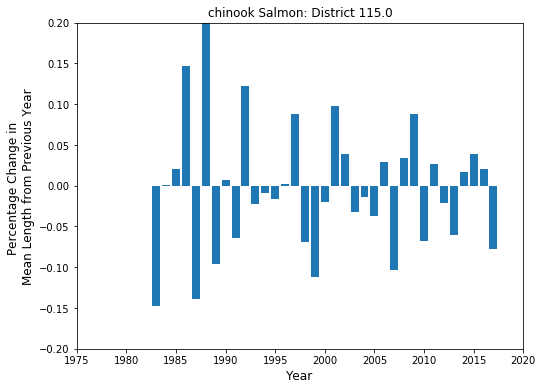

In [86]:
salmontype = 'chinook'

chinook = data_small[data_small['Species']==salmontype]
chinookyear = chinook.groupby(['sampleYear','DistrictID'])
yearcount = chinookyear['Length'].mean().unstack()

distlist = chinook['DistrictID'].unique()
d = 7
diff = []
for y in np.arange(1, yearcount.shape[0]):
    change = (yearcount[distlist[d]].values[y] - yearcount[distlist[d]].values[y-1])/yearcount[distlist[d]].values[y-1]
    diff.append(change)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(yearcount.index[1:], diff)
ax.set_ylim(-0.2, 0.2)
ax.set_xlim(1975, 2020)
ax.set_ylabel('Percentage Change in \nMean Length from Previous Year', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_title('{} Salmon: District {}'.format(salmontype, distlist[d]))